In [8]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [9]:
from google.colab import drive


if os.path.exists('/content/drive')==False:
    drive.mount('/content/drive')
    print('Google Drive is mounted\n')
else:
    print('Google Drive is already mounted\n')

Google Drive is already mounted



In [10]:
train_path="/content/drive/My Drive/brain_mri/training"
test_path="/content/drive/My Drive/brain_mri/testing"

In [4]:

x_train = np.load('/content/drive/My Drive/brain_mri/x_train.npy')
y_train = np.load('/content/drive/My Drive/brain_mri/y_train.npy')
x_test = np.load('/content/drive/My Drive/brain_mri/x_test.npy')
y_test = np.load('/content/drive/My Drive/brain_mri/y_test.npy')

In [11]:

x_train.shape,x_test.shape

((2870, 224, 224, 3), (404, 224, 224, 3))

In [12]:
y_train.shape,y_test.shape

((2870,), (404,))

In [13]:
from __future__ import print_function

import numpy as np
from random import shuffle
import time
import csv
from PIL import Image
import os
import tensorflow as tf
import keras
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras import initializers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing import sequence
from keras.utils import np_utils
from tensorflow.keras.models import Sequential,load_model,Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras import callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import sklearn.metrics as sklm

In [15]:
# for reproducibility
np.random.seed(3768)

# use this environment flag to change which GPU to use 
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"  # specify which GPU(s) to be used

#Get TensorFlow session
def get_session(): 
  config = tf.ConfigProto() 
  config.gpu_options.allow_growth = True 
  return tf.Session(config=config) 
  
# One hot encoding of labels 
def dense_to_one_hot(labels_dense,num_clases=4):
  return np.eye(num_clases)[labels_dense]

In [16]:
train_y = dense_to_one_hot(y_train,num_clases=4)
test_y= dense_to_one_hot(y_test,num_clases=4)

In [17]:
train_y.shape

(2870, 4)

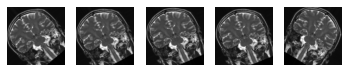

In [18]:

#Data Augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False, 
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,  
    zca_whitening=False,
    rotation_range=50,
    width_shift_range=0.01, 
    height_shift_range=0.01, 
    horizontal_flip=False, 
    vertical_flip=False)

datagen.fit(x_train)

from matplotlib import pyplot as plt

gen = datagen.flow(x_train[1:2], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze())
    plt.plot()
plt.show()


In [19]:
x_train.shape

(2870, 224, 224, 3)

# Model

In [20]:
from __future__ import print_function

import numpy as np
from random import shuffle
import time
import csv
from PIL import Image
import os
import tensorflow as tf
import keras
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras import initializers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing import sequence
from keras.utils import np_utils
from tensorflow.keras.models import Sequential,load_model,Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras import callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import sklearn.metrics as sklm
from __future__ import absolute_import

from __future__ import division

from __future__ import print_function

import os
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

In [22]:
def VGG19(input_shape=None,classes=4, use_soft=True):


    img_input = layers.Input(shape=input_shape)


    # Block 1

    x = layers.Conv2D(2, (3, 3),

                      activation='relu',

                      padding='same',

                      name='block1_conv1',kernel_initializer="he_normal")(img_input)

    x = layers.Conv2D(2, (3, 3),

                      activation='relu',

                      padding='same',

                      name='block1_conv2',kernel_initializer="he_normal")(x)

    x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)



    # Block 2

    x = layers.Conv2D(4, (3, 3),

                      activation='relu',

                      padding='same',

                      name='block2_conv1',kernel_initializer="he_normal")(x)

    x = layers.Conv2D(4, (3, 3),

                      activation='relu',

                      padding='same',

                      name='block2_conv2',kernel_initializer="he_normal")(x)

    x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)



    # Block 3

    x = layers.Conv2D(8, (3, 3),

                      activation='relu',

                      padding='same',

                      name='block3_conv1',kernel_initializer="he_normal")(x)

    x = layers.Conv2D(8, (3, 3),

                      activation='relu',

                      padding='same',

                      name='block3_conv2',kernel_initializer="he_normal")(x)

    x = layers.Conv2D(8, (3, 3),

                      activation='relu',

                      padding='same',

                      name='block3_conv3',kernel_initializer="he_normal")(x)
    x = layers.Conv2D(8, (3, 3),

                      activation='relu',

                      padding='same',

                      name='block3_conv4',kernel_initializer="he_normal")(x)

    x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)



    # Block 4

    x = layers.Conv2D(16, (3, 3),

                      activation='relu',

                      padding='same',

                      name='block4_conv1',kernel_initializer="he_normal")(x)

    x = layers.Conv2D(16, (3, 3),

                      activation='relu',

                      padding='same',

                      name='block4_conv2',kernel_initializer="he_normal")(x)

    x = layers.Conv2D(16, (3,3),

                      activation='relu',

                      padding='same',

                      name='block4_conv3',kernel_initializer="he_normal")(x)
    x = layers.Conv2D(16, (3,3),

                      activation='relu',

                      padding='same',

                      name='block4_conv4',kernel_initializer="he_normal")(x)

    x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)



    # Block 5

    x = layers.Conv2D(16, (3, 3),

                      activation='relu',

                      padding='same',

                      name='block5_conv1',kernel_initializer="he_normal")(x)

    x = layers.Conv2D(16, (3, 3),

                      activation='relu',

                      padding='same',

                      name='block5_conv2',kernel_initializer="he_normal")(x)

    x = layers.Conv2D(16, (3, 3),

                      activation='relu',

                      padding='same',

                      name='block5_conv3',kernel_initializer="he_normal")(x)
    x = layers.Conv2D(16, (3, 3),

                      activation='relu',

                      padding='same',

                      name='block5_conv4',kernel_initializer="he_normal")(x)

    x = layers.MaxPooling2D((2, 2), strides=(2,2), name='block5_pool')(x)


        # Classification block

    x = layers.Flatten(name='flatten')(x)

    x = layers.Dense(512, activation='relu', name='fc1')(x)
    x=layers.Dropout(0.5)(x)

    x = layers.Dense(128, activation='relu', name='fc2')(x)
    #x=layers.Dropout(0.8)(x)

    if use_soft:
        x = Dense(classes, activation = "softmax", name='predictions')(x)
    else:
        x = Dense(classes, activation = "linear", name = "Z_4")(x)

    model = models.Model(img_input, x, name='vgg19')
    model.summary()

    return model



In [23]:
from tensorflow.keras.models import Sequential
tf.compat.v1.get_default_graph()

In [24]:
#Defining hyperparameters
batch_Size = 32
steps_Per_Epoch = 32
numEpochs = 50

#Instantating VGG19 model
model = VGG19((224,224,3),4) #VGG19_dense for revised VGG19, VGG19 for VGG19. Please pay attention to VGG16(), chnage the input shape and class number in VGG.py.

#Creating an optimizers
adaDelta = tf.keras.optimizers.Adadelta(lr=1.0, rho=0.95)
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.95, nesterov=True)
model.compile(optimizer = sgd , loss = 'categorical_crossentropy', metrics = ['accuracy'])

#Creating early stopping 
earlystop = EarlyStopping(monitor = 'val_accuracy', min_delta = 0, patience = 50, verbose = 1, mode = 'auto', restore_best_weights = True)       

train_generator = datagen.flow(x_train,train_y, batch_size = batch_Size)
validation_generator = datagen.flow(x_test, test_y, batch_size = batch_Size)

# Model training
history = model.fit_generator(
    train_generator,
    steps_per_epoch = steps_Per_Epoch,
    validation_data = validation_generator, 
    validation_steps = 5,
    epochs = numEpochs,
    shuffle = True,
    verbose = 1)

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 2)       56        
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 2)       38        
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 2)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 4)       76        
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 4)       148       
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 4)         0     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
32/32 [==============================] - 36s 473ms/step - loss: 1.3665 - accuracy: 0.2734 - val_loss: 1.4348 - val_accuracy: 0.2438
Epoch 2/50
32/32 [==============================] - 14s 441ms/step - loss: 1.3465 - accuracy: 0.2998 - val_loss: 1.4685 - val_accuracy: 0.1375
Epoch 3/50
32/32 [==============================] - 14s 451ms/step - loss: 1.3496 - accuracy: 0.3057 - val_loss: 1.4461 - val_accuracy: 0.2875
Epoch 4/50
32/32 [==============================] - 14s 450ms/step - loss: 1.3532 - accuracy: 0.2939 - val_loss: 1.4446 - val_accuracy: 0.1875
Epoch 5/50
32/32 [==============================] - 14s 442ms/step - loss: 1.2879 - accuracy: 0.4043 - val_loss: 1.4831 - val_accuracy: 0.2125
Epoch 6/50
32/32 [==============================] - 14s 444ms/step - loss: 1.3182 - accuracy: 0.3340 - val_loss: 1.4209 - val_accuracy: 0.2062
Epoch 7/50
32/32 [==============================] - 14s 452ms/step - loss: 1.2969 - accuracy: 0.3672 - val_loss: 1.6176 - val_accuracy: 0.2812

In [28]:
modelPath = "/content/drive/My Drive/brain_mri/VGG19_COVID19.h5"
resultPath = '/content/drive/My Drive/brain_mri/VGG19_COVID19.txt'

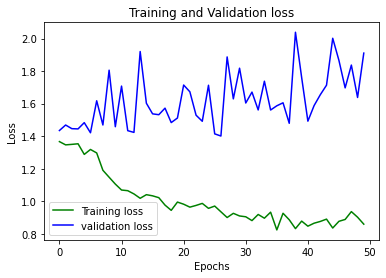

In [29]:

loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,50)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

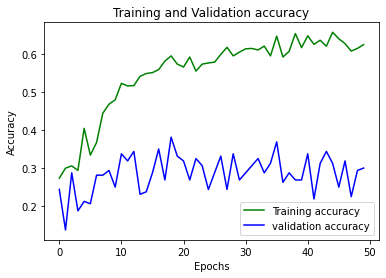

In [26]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(0,50)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [30]:
score, acc = model.evaluate(x_test, test_y, batch_size=batch_Size)
print("Accuracy:", acc)

#if acc>0.675:
model.save_weights(modelPath)

13/13 [==============================] - 0s 29ms/step - loss: 1.8992 - accuracy: 0.2995
Accuracy: 0.29950493574142456


In [31]:
from sklearn.metrics import confusion_matrix, classification_report

predict_idxs = model.predict(x_test, batch_size=batch_Size)
predict_idxs = np.argmax(predict_idxs, axis=1)
cm = confusion_matrix(np.argmax(test_y, axis=1), predict_idxs)
cm

array([[ 68,  13,   7,  12],
       [ 83,  16,   3,  13],
       [104,   5,   0,   6],
       [ 28,   7,   2,  37]])

In [32]:
print(classification_report(np.argmax(test_y, axis=1), predict_idxs))

              precision    recall  f1-score   support

           0       0.24      0.68      0.36       100
           1       0.39      0.14      0.21       115
           2       0.00      0.00      0.00       115
           3       0.54      0.50      0.52        74

    accuracy                           0.30       404
   macro avg       0.29      0.33      0.27       404
weighted avg       0.27      0.30      0.24       404



# Explainability - Grad-CAM

In [61]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10,10

from scipy.ndimage.interpolation import zoom
#import VGG
#import gradcamutils
import numpy as np
import os
from PIL import Image


In [42]:
# use this environment flag to change which GPU to use 
os.environ["CUDA_VISIBLE_DEVICES"]="-1"  # specify which GPU(s) to be used

In [49]:
def createOrRestoreModel(): 
    vggModel = VGG19((224,224,3),4, False) #set up model architecture

    vggModel.summary()
    vggModel.load_weights("/content/drive/My Drive/brain_mri/VGG19_COVID19.h5") #load weights

    model = vggModel

    return model

In [50]:
def readTestImage(img_path): 
    img = Image.open(img_path) #open image you want to visualize "1238_R.png"

    img = np.array(img.resize((224,224), Image.ANTIALIAS))
    imgArr = img.reshape(1,224,224,3)#open image you want to visualize
    imgNormalized = imgArr / 255.
    
    return img, imgArr, imgNormalized

In [55]:
target_names = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

In [51]:
model = createOrRestoreModel()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 2)       56        
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 2)       38        
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 2)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 4)       76        
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 4)       148       
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 4)         0     

In [52]:
from skimage import data, color, io, img_as_float

def get_heatmap(vgg_conv, processed_image, class_idx):

    eps=1e-8
    
    gradModel = Model(
            inputs=[vgg_conv.inputs],
            outputs=[vgg_conv.get_layer('block5_conv4').output, vgg_conv.output])

    # record operations for automatic differentiation
    with tf.GradientTape() as tape:
        # cast the image tensor to a float-32 data type, pass the
        # image through the gradient model, and grab the loss
        # associated with the specific class index
        inputs = tf.cast(processed_image, tf.float32)
        (convOutputs, predictions) = gradModel(inputs)
        loss = predictions[:, class_idx]

    # use automatic differentiation to compute the gradients
    grads = tape.gradient(loss, convOutputs)
        
    # compute the guided gradients
    castConvOutputs = tf.cast(convOutputs > 0, "float32")
    castGrads = tf.cast(grads > 0, "float32")
    guidedGrads = castConvOutputs * castGrads * grads

    # the convolution and guided gradients have a batch dimension
    # (which we don't need) so let's grab the volume itself and
    # discard the batch
    convOutputs = convOutputs[0]
    guidedGrads = guidedGrads[0]

    # compute the average of the gradient values, and using them
    # as weights, compute the ponderation of the filters with
    # respect to the weights
    weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
    cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

    # grab the spatial dimensions of the input image and resize
    # the output class activation map to match the input image
    # dimensions
    (w, h) = (processed_image.shape[2], processed_image.shape[1])
    heatmap = cv2.resize(cam.numpy(), (w, h))

    # normalize the heatmap such that all values lie in the range
    # [0, 1], scale the resulting values to the range [0, 255],
    # and then convert to an unsigned 8-bit integer
    numer = heatmap - np.min(heatmap)
    denom = (heatmap.max() - heatmap.min()) + eps
    heatmap = numer / denom
    heatmap = (heatmap * 255).astype("uint8")
        
    

    return heatmap

In [53]:
def print_GradCAM(base_model, path_image):
    # select the sample and read the corresponding image and label
    sample_image = cv2.imread(path_image)
    # pre-process the image
    sample_image = cv2.resize(sample_image, (224,224))
    if sample_image.shape[2] ==1:
                sample_image = np.dstack([sample_image, sample_image, sample_image])
    sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
    sample_image = sample_image.astype(np.float32)/255.
#     sample_label = 1

    #since we pass only one image,we expand dim to include batch size 1
    sample_image_processed = np.expand_dims(sample_image, axis=0)

    # get the label predicted by our original model
    pred_label = np.argmax(base_model.predict(sample_image_processed), axis=-1)[0]
    print(base_model.predict(sample_image_processed))

    # get the heatmap for class activation map(CAM)
    heatmap = get_heatmap(base_model, sample_image_processed, pred_label)
    heatmap = cv2.resize(heatmap, (sample_image.shape[0], sample_image.shape[1]))
    heatmap = heatmap *255
    heatmap = np.clip(heatmap, 0, 255).astype(np.uint8)
#     heatmap = 255 - heatmap
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # f,ax = plt.subplots(1,2, figsize=(16,6))
    plt.figure()
    f, ax = plt.subplots(ncols=3, figsize=(16, 6))

    ax[1].imshow(heatmap)
    ax[1].set_title("heatmap")
    ax[1].axis('off')

    #superimpose the heatmap on the image    
    sample_image_hsv = color.rgb2hsv(sample_image)
    heatmap = color.rgb2hsv(heatmap)

    alpha=0.7
    sample_image_hsv[..., 0] = heatmap[..., 0]
    sample_image_hsv[..., 1] = heatmap[..., 1] * alpha

    img_masked = color.hsv2rgb(sample_image_hsv)

    # f,ax = plt.subplots(1,2, figsize=(16,6))
    ax[0].imshow(sample_image)
    ax[0].set_title(f"original image (predicted label: {target_names[pred_label]})")
    ax[0].axis('off')

    ax[2].imshow(img_masked)
    ax[2].set_title("superimposed image")
    ax[2].axis('off')

    plt.show()

In [57]:
img_path="/content/drive/My Drive/brain_mri/Testing/glioma_tumor/image.jpg"
img, imgArr, imgNormalized = readTestImage(img_path)

In [58]:
pred = model.predict(imgNormalized)

class_prob = pred.tolist()
softMaxProb = class_prob[0]

softMaxProb

[0.8035392761230469,
 0.8184152841567993,
 -0.25752562284469604,
 -1.3451896905899048]

[[ 0.82532954  0.8357425  -0.25491917 -1.3864102 ]]


<Figure size 432x288 with 0 Axes>

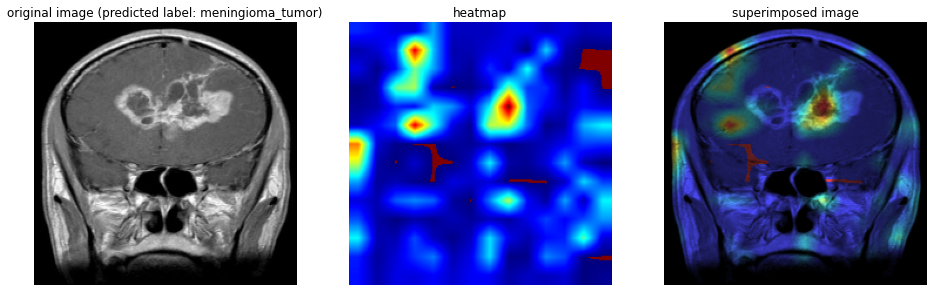

In [60]:
print_GradCAM(model, img_path)